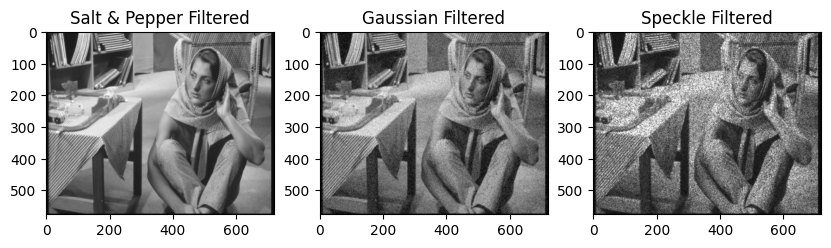

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def median_filter(image, filter_size):
    padding = filter_size // 2
    result = np.zeros_like(image)

    for i in range(padding, image.shape[0] - padding):
        for j in range(padding, image.shape[1] - padding):
            window = image[i - padding:i + padding + 1, j - padding:j + padding + 1]
            result[i, j] = np.median(window)

    return result

# Read the images
img1 = plt.imread('/content/drive/MyDrive/Colab Notebooks/addsalt.jpg')
img2 = plt.imread("/content/drive/MyDrive/Colab Notebooks/gaussian_noise.jpg")
img3 = plt.imread("/content/drive/MyDrive/Colab Notebooks/speckle_noise.jpg")

# Apply median filter to reduce noise
salt_filtered = median_filter(img1, filter_size=3)
gaussian_filtered = median_filter(img2, filter_size=3)
speckle_filtered = median_filter(img3, filter_size=3)

# Display the images
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(salt_filtered, cmap='gray')
plt.title('Salt & Pepper Filtered')

plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered')

plt.subplot(1, 3, 3)
plt.imshow(speckle_filtered, cmap='gray')
plt.title('Speckle Filtered')

plt.show()


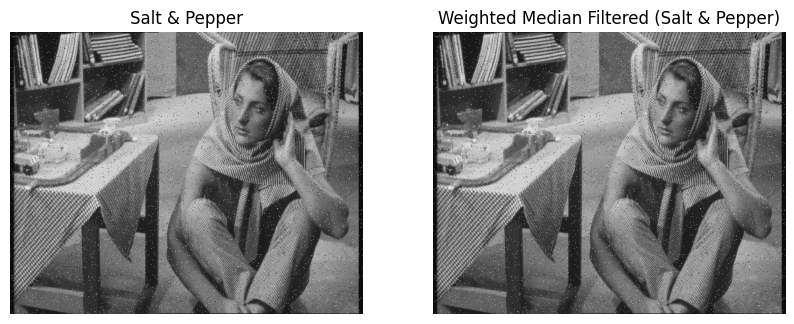

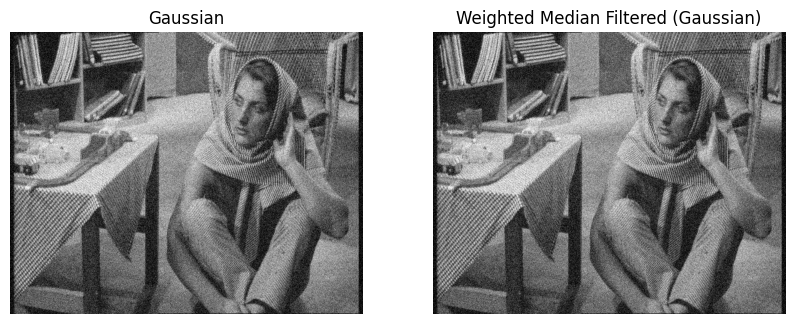

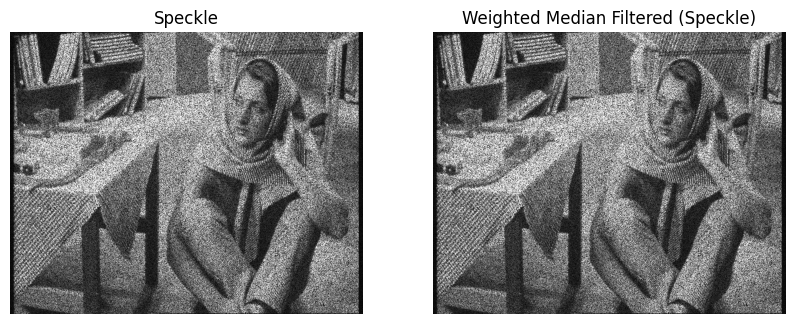

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def weighted_median_filter(image, kernel_size, weights):
    rows, cols = image.shape[:2]
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)

    filtered_image = np.zeros_like(image)

    for i in range(pad_size, rows + pad_size):
        for j in range(pad_size, cols + pad_size):
            neighborhood = padded_image[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]  # Entire neighborhood
            center_pixel = padded_image[i, j]

            # Compute weighted sum of the neighborhood
            kernel = weights.astype(np.float32)
            weighted_sum = np.sum(neighborhood * kernel)

            # Compute weighted median
            intensity_diff = np.abs(neighborhood - center_pixel)
            weights = 1.0 / (1.0 + intensity_diff)

            # Find the index corresponding to the median weight
            sorted_indices = np.argsort(neighborhood, axis=None)[::-1]  # Reverse to get descending order
            cumulative_weights = np.cumsum(weights.flatten()[sorted_indices])
            median_index = np.argmax(cumulative_weights >= cumulative_weights[-1] / 2)

            # Assign the value of the pixel at the median index to the filtered image
            filtered_image[i - pad_size, j - pad_size] = neighborhood.flatten()[sorted_indices[median_index]]

    return filtered_image

def show_images(original, filtered, title_original, title_filtered):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title_filtered)
    plt.axis('off')

    plt.show()

# Read the images
img1 = plt.imread('/content/drive/MyDrive/Colab Notebooks/addsalt.jpg')
img2 = plt.imread("/content/drive/MyDrive/Colab Notebooks/gaussian_noise.jpg")
img3 = plt.imread("/content/drive/MyDrive/Colab Notebooks/speckle_noise.jpg")

# Apply weighted median filter to reduce noise
weights = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])  # Example weights for a 3x3 filter
salt_filtered = weighted_median_filter(img1, kernel_size=3, weights=weights)
gaussian_filtered = weighted_median_filter(img2, kernel_size=3, weights=weights)
speckle_filtered = weighted_median_filter(img3, kernel_size=3, weights=weights)

# Display the images
show_images(img1, salt_filtered, 'Salt & Pepper', 'Weighted Median Filtered (Salt & Pepper)')

show_images(img2, gaussian_filtered, 'Gaussian', 'Weighted Median Filtered (Gaussian)')

show_images(img3, speckle_filtered, 'Speckle', 'Weighted Median Filtered (Speckle)')


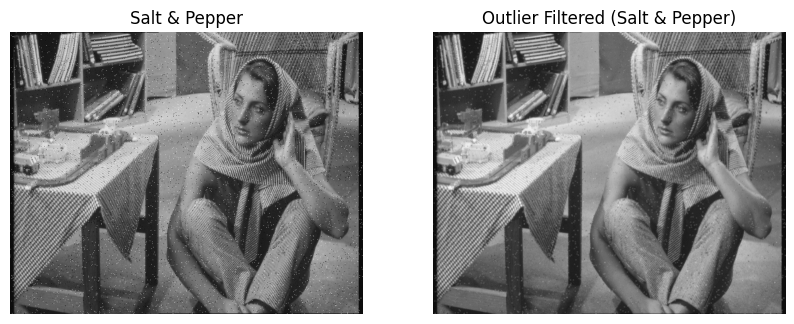

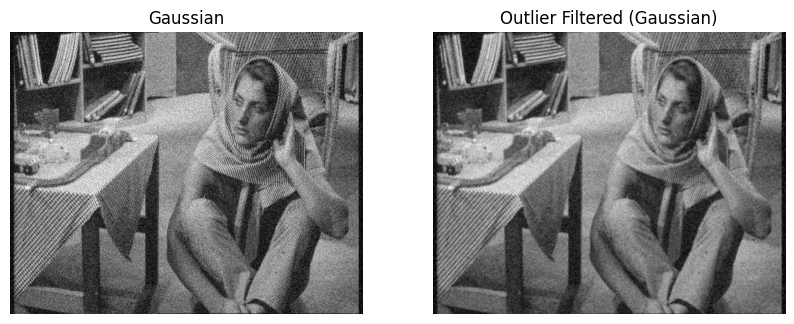

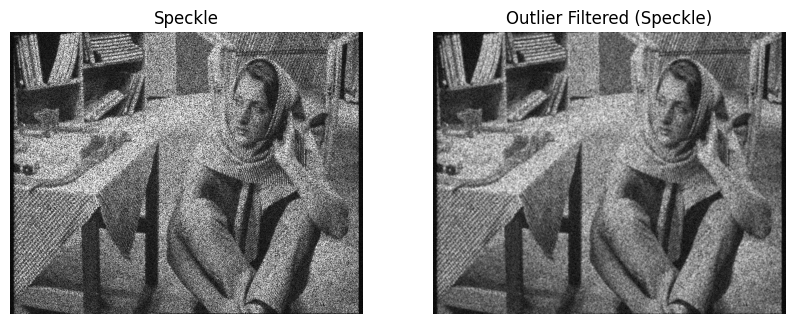

In [8]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

def outlier_filter(img, d):
    pad_size = 1
    pad_img = np.pad(img, pad_width=pad_size, mode="reflect")
    kernel = np.ones((3, 3), dtype=np.float32) / 9

    output_img = np.where(
        np.abs(convolve2d(pad_img, kernel, mode='valid') - pad_img[pad_size:-pad_size, pad_size:-pad_size]) > d,
        convolve2d(pad_img, kernel, mode='valid'),
        pad_img[pad_size:-pad_size, pad_size:-pad_size]
    )

    return output_img

def show_images(original, filtered, title_original, title_filtered):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered, cmap='gray')
    plt.title(title_filtered)
    plt.axis('off')

    plt.show()

# Read the images
img1 = plt.imread('/content/drive/MyDrive/Colab Notebooks/addsalt.jpg')
img2 = plt.imread("/content/drive/MyDrive/Colab Notebooks/gaussian_noise.jpg")
img3 = plt.imread("/content/drive/MyDrive/Colab Notebooks/speckle_noise.jpg")

# Set the threshold 'd' for outlier detection
d = 20  # Adjust the threshold 'd' as needed

# Apply outlier filter to original images
salt_filtered = outlier_filter(img1, d)
gaussian_filtered = outlier_filter(img2, d)
speckle_filtered = outlier_filter(img3, d)

# Display the images
show_images(img1, salt_filtered, 'Salt & Pepper', 'Outlier Filtered (Salt & Pepper)')
show_images(img2, gaussian_filtered, 'Gaussian', 'Outlier Filtered (Gaussian)')
show_images(img3, speckle_filtered, 'Speckle', 'Outlier Filtered (Speckle)')
